## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [82]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [83]:
#read in the dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [85]:
#get number of rows and columns
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [87]:
#get number of unique values in each column
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [88]:
#get number of unique values in column 'user_id'
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [89]:
#calculate the proportion of users, that converted. As column 'converted' has bivariate values, we can use mean() to get the proportion.
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [92]:
#get number of rows, where column 'landing_page' has the value 'new_page' and the column 'group' has the value 'control'
number1 = len(df[(df["landing_page"]=='new_page')&(df["group"]=='control')])
number1

1928

In [93]:
#get number of rows, where column 'landing_page' has the value 'old_page' and the column 'group' has the value 'treatment'
number2 = len(df[(df["landing_page"]=='old_page')&(df["group"]=='treatment')])
number2

1965

In [94]:
#calculate the sum of number1 and number2, in order to calculate the number of times, the `new_page` and `treatment` don't line up
result = number1 + number2
result

3893

f. Do any of the rows have missing values?

In [95]:
#identify number of missing values in each column
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [96]:
# Get names of indexes for which column 'group' has value 'control' and column 'landing_page' has value 'new_page'
indexNames = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')].index
 
# Delete these row indexes from dataFrame, I took out inplace=True, so that I can save changes to new dataframe
df1 = df.drop(indexNames)
df1.shape

(292550, 5)

In [97]:
# Get names of indexes for which column 'group' has value 'treatment' and column 'landing_page' has value 'old_page'
indexNames = df1[(df1['group'] == 'treatment') & (df['landing_page'] == 'old_page')].index
 
# Delete these row indexes from dataFrame, I took out inplace=True, so that I can save changes to new dataframe
df2 = df1.drop(indexNames)
df2.shape

C:\Users\Martin\Anaconda2\envs\data-3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(290585, 5)

In [98]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [100]:
#get number of user_id's from df2
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [101]:
#find the repeated user_id in df2
counts = df2.groupby('user_id').size()
df3 = pd.DataFrame(counts, columns = ['size'])
df3 = df3[df3['size']>1]
df3

,size
user_id,
773192,2


c. What is the row information for the repeat **user_id**? 

In [103]:
#get those indexes, what contain repeated user_id
df2.index[df2['user_id'] == 773192].tolist()

[1899, 2893]

In [105]:
#check values for row whit index == 1899
df2.loc[[1899]]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [106]:
#check values for row whit index == 2893
df2.loc[[2893]]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [108]:
#find the row number with the index 2893
df2[2862:2863]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [109]:
#delete the row with the number 2862, this has the index 2893
df2.drop(df2.index[2862], inplace=True)

In [110]:
df2.loc[[2894]]

,user_id,timestamp,group,landing_page,converted
2894,884145,2017-01-09 15:45:38.457508,treatment,new_page,0


In [112]:
#check if there are any repeated user_id's left
counts = df2.groupby('user_id').size()
df3 = pd.DataFrame(counts, columns = ['size'])
df3 = df3[df3['size']>1]
df3

,size
user_id,


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [114]:
#calculate the probability of users, that converted. As column 'converted' has bivariate values, we can use mean() to get the probability.
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [115]:
#calculate the conversion probability of the control group 
control_conv = df2.query("group == 'control'")['converted'].mean()
control_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [116]:
#calculate the conversion probability of the treatment group 
treatment_conv = df2.query("group == 'treatment'")['converted'].mean()
treatment_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [26]:
#get number of rows, where individuals receive new page in df2
(df2.landing_page == 'new_page').sum() 

145310

In [27]:
#get number of rows in df2
df2.shape[0]

290584

In [117]:
# calcualte probability that an individual received the new page
(df2.landing_page == 'new_page').sum() / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

If an individual belongs to the control group and therefor receives the old page, the probability to convert is 12,04%. On the other side, an individual from the treatment group, that gets the new page, has a probability to convert of 11,88%. The difference between the converting probabilities of both groups is very little, moreover, the probability to convert for the control group is higher than for the treatment group. That's why I would say that there is no evidence to say that the new treatment page leads to more conversions, according to the results above.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$H_0: p_{new} \leq p_{old}$  <br>
$H_1: p_{new} > p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [118]:
#null hupothesis means: p_new and p_old is the same
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [119]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [120]:
#get number of individuals, what receive the new page in df2.
n_new = len(df2[df2['landing_page']=='new_page'])
n_new

145310

d. What is $n_{old}$?

In [121]:
#get number of individuals, what receive the old page in df2.
n_old = len(df2[df2['landing_page']=='old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [122]:
#first value in brackets: number of events (here: 1) 
#second value in brackets: probability to get value 1 (here: p_new)
#third value in brackets: size of simulation (here: n_new)
new_page_converted = np.random.binomial(1, p_new, n_new)
new_conv_mean = new_page_converted.mean()
new_conv_mean

0.11984034133920583

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [123]:
#first value in brackets: number of events (here: 1) 
#second value in brackets: probability to get value 1 (here: p_old)
#third value in brackets: size of simulation (here: n_old)
old_page_converted = np.random.binomial(1, p_old, n_old)
old_conv_mean = old_page_converted.mean()
old_conv_mean

0.11867918553905035

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [124]:
sim_diff = new_conv_mean - old_conv_mean
sim_diff

0.0011611558001554806

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [125]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.binomial(1, p_old, n_old)
    old_conv_mean = old_page_converted.mean()
    new_page_converted = np.random.binomial(1, p_new, n_new)
    new_conv_mean = new_page_converted.mean()
    p_diffs.append(new_conv_mean - old_conv_mean)
    

In [126]:
#convert list to array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [127]:
#observed difference of conversion proportions in ab_data.csv
obs_diff = treatment_conv - control_conv
obs_diff

-0.0015782389853555567

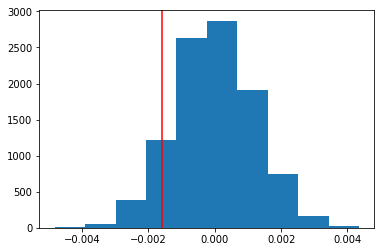

In [128]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [130]:
#get proportion of simulated differences, that are greater than actual differences observed in the dataset. 
(p_diffs > obs_diff).mean()

0.9036

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

I calculated the p-value. The meaning of the p-value is: If the null hypohesis  is true: Probability of obtaining the observed statistic or one more extreme in favor of the alternative<br>
If we have the alternative hypothesis that the conversion rate is greater 
than p_old or p_new (both are similar as stated above), then we
calculate p-value as proportion of the simulated differences (here p_diffs)
that are larger than our observed differences. The result says, that more
than 90% of simulated differences are greater than the oberserved differences. That means: 90% of the differences are pure chance (just simulated and not observed in actual dataset. The observed difference in only higher than the simulated difference in about 9% of all simulated and observed differences. So I can assume that the conversion rates of both pages are similar.<br>
Due to the fact, that the p-value is larger than the type I error threshold (\alpha = 5%), we fail to reject the null hypothesis. That means there is no statistically significant difference between the conversion rates of the old and the new page, or that the new page has higher conversion rates than the old one, therefor the old page should be kept. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [131]:
import statsmodels.api as sm

convert_old =  df2.query('group == "control"')['converted'].sum()
convert_new = df2.query("group == 'treatment'")['converted'].sum()
n_old = len(df2[df2['landing_page']=='old_page'])
n_new = len(df2[df2['landing_page']=='new_page'])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [132]:
#get the z-score and the p-value
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [135]:
#pick a significance level at 95%
from scipy.stats import norm

norm.cdf(z_score)
# 0.9999999383005862 # Tells us how significant our z-score is

norm.ppf(1-(0.05/2))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

A z-score is a measurement of a value's relationship to the mean of a group of values (equal to standard deviation from the mean). If a z-score is 0, it shows that the data point's score is equal to the mean sore. A z-score of 1 indicates a value that is one standard deviation from the mean. Positive z-scores indicate, the score is above the mean and vise versa.<br>
Our z-score of around -1.31 does not exceed the significance level of 1.96. That means we fail to reject the null hypothesis (similar to the results in **k.**, that the old page has a conversion rate that is higher or equal to the new page. In other words, the conversion rates of the old and the new page are not statistically different from one another.<br>
From `stats.proportions_ztest` we computed a p-value of around 0.905,what equals the result from **j.**. The parameter `alternative = 'larger'` indicates the symbol `>` of the code `(p_diffs > obs_diff).mean()` above. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**<br>
For categorical variables like "converted" or "not converted", I should perform a logistic regression. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [136]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [137]:
#add intercept column and change categorical variables to dummy variables: "1" --> treatment; "0" --> control
df2['intercept'] = 1
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [139]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        20:54:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [140]:
#Exponentiate the coefficients for interpretation.
np.exp(-1.9888), np.exp(-0.0150)

(0.13685955841614492, 0.9851119396030626)

Each of these resulting values is multiplicative change in the odds.When we receive multiplicative changes less than one, like we did here with the 'ab_page', we should compute the reciprocal, this changes the direction for the unit increase to a unit decrease.

In [141]:
#Compute the reciprocal
1/np.exp(-1.9888), 1/np.exp(-0.0150)

(7.3067603868728614, 1.015113064615719)

For each 1 unit decrease in ab_page (change from new page to old page), conversion is 1.015 times as likely holding all else constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value in part II is about 90,36% and the p-value computed with the regression model is 19%. In Part II we conducted a one directional hypothesis test, but in Part III, a two directional hypothesis test was realized. That is the reason for the different p-values.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It would be good to consider the timestamp and add it into the regression model. If we do not differenciate between different timeslots, novelty effects (existing users give unfair advantage to new page, because they are excited to change) or change aversions (existing users give unfair advantage to old page, because they are unhappy with change) could distort the results.<br><br>
We might also ask questions about the practical significance of a conversion rate. E.g. are the costs for launching a new feature in the new web page reasonable compared to the potential increase of the conversion rate?
<br><br>
If we add additional variables to the regression model, we might also face some disadvantages or challenges like multicollinearity. If we consider multiple explanatory variables, they could interact between each other and lead to different changes of the responding variable. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [142]:
#join two data frames
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [143]:
#get unique values from column 'country'
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [144]:
### Create the necessary dummy variables
df_new['intercept'] = 1
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [145]:
#fit logostic regression model
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Feb 2019   Pseudo R-squ.:               1.521e-05
Time:                        20:59:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

In [146]:
#exponentiate coefficients for interpretation
np.exp(-0.0099), np.exp(-0.0507)

(0.9901488436829572, 0.9505637969004034)

UK is taken as the baseline. The p-values for the dummy variables 'US' and 'CA' are bigger than 0.05. This suggests there is no statistically significant relationship between the variable and the response variable.
Annyway, if a person comes from the US,  conversion is 0.99 times as likely as if the person comes from the UK, holding all other variables constant. If a person comes from Canada,  conversion is 0.95 times as likely as if the person comes from the UK, holding all other variables constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [147]:
#create new dummy variable for 'landing_page' equals 'old_page'
df_new[['new', 'old']] = pd.get_dummies(df_new['landing_page'])
df_new.drop(labels=['new'], axis=1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,old
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0


In [149]:
#create new columns, what combine 'landing_page' and 'country' with each other
df_new['new_CA'] = df_new['ab_page']*df_new['CA']
df_new['new_US'] = df_new['ab_page']*df_new['US']
df_new['new_UK'] = df_new['ab_page']*df_new['UK']
df_new['old_CA'] = df_new['old']*df_new['CA']
df_new['old_US'] = df_new['old']*df_new['US']
df_new['old_UK'] = df_new['old']*df_new['UK']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,old,new_CA,new_US,new_UK,old_CA,old_US,old_UK
user_id,,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,1,0,0,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,1,0,0,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0,0,1,0,0,0


**Interaction between old and new page in UK**<br>
dummy variable 'old_UK' is taken it as baseline

In [151]:
### Fit Your Linear Model And Obtain the Results
### the dependent variable is categorical, that's why I would use a logistic and not a linear model
#see interaction between old and new page in UK
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'new_UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Feb 2019   Pseudo R-squ.:               4.544e-06
Time:                        21:03:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3255
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9984      0.006   -326.853      0.000      -2.010      -1.986
new_UK         0.0170      0.017      0.985      0.325      -0.017       0.051
==============================================================================
"""

In [152]:
#exponentiate coefficients for interpretation
np.exp(0.0170)

1.0171453223252407

**Interpretation of results: Interaction between old and new page in UK**<br>
The p-values for the dummy variable 'new_UK' is bigger than 0.05. This suggests there is no statistically significant relationship between the variable and the response variable. However, if a person from UK visits the new page, conversion is 1.017 times as likely as if the person from UK visits the old page.


**Interaction between old and new page in Canada**<br>
dummy variable 'old_CA' is taken it as baseline

In [153]:
#see interaction between old and new page in CA
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'new_CA']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Feb 2019   Pseudo R-squ.:               2.016e-05
Time:                        21:04:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.03834
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9944      0.006   -344.689      0.000      -2.006      -1.983
new_CA        -0.0771      0.038     -2.052      0.040      -0.151      -0.003
==============================================================================
"""

In [154]:
#exponentiate coefficients for interpretation
np.exp(-0.0771)

0.9257972692504297

**Interpretation of results: Interaction between old and new page in Canad**<br>
The p-values for the dummy variable 'new_CA' is smaller than 0.05. This suggests there is a statistically significant relationship between the variable and the response variable. If a person from Canada visits the new page, conversion is 0.926 times as likely as if the person from Canada visits the old page.


**Interaction between old and new page in the US**<br>
dummy variable 'old_US' is taken it as baseline

In [155]:
#see interaction between old and new page in US
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'new_US']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Feb 2019   Pseudo R-squ.:               8.979e-06
Time:                        21:05:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1669
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9905      0.007   -281.174      0.000      -2.004      -1.977
new_US        -0.0166      0.012     -1.381      0.167      -0.040       0.007
==============================================================================
"""

In [156]:
#exponentiate coefficients for interpretation
np.exp(-0.0166)

0.9835370207707463

**Interpretation of results: Interaction between old and new page in US**<br>
The p-values for the dummy variable 'new_US' is bigger than 0.05. This suggests there is no statistically significant relationship between the variable and the response variable. If a person from the US visits the new page, conversion is 0.984 times as likely as if the person from the US visits the old page.


## Resources
http://knowledgetack.com/python/statsmodels/proportions_ztest/<br>
https://ryanwingate.com/assets/projects/A-B_Test_Result_Analysis.html


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.